<div class="alert alert-success alertinfo" style="margin-top: 0px">
<h1>  Part 1. Exploratory analysis </h1>    
</div>

# 1. Imports

In [2]:
# Turning off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Manipulation
import sys
import random
import pandas as pd
import numpy as np

# Preprocessing
import missingno

# Visualization 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [4]:
# Import data
raw_data=pd.read_excel(r"C:\Users\giuse\Desktop\job seeking\DATAscience_interview\recommendation_engine_data.xlsx")

# 2. Raw Data View

In [5]:
raw_data.head()

,USER_ID,CURRENCY,CURRENCY_IS_CRYPTO,GAME_TITLE,GAME_TYPE,GAME_PROVIDER,BET_AMOUNT_IN_CURRENCY,BET_AMOUNT_IN_EUR,BET_COUNT,WIN_AMOUNT_IN_CURRENCY,WIN_AMOUNT_IN_EUR,WIN_COUNT
0,1,BTC,Y,Fire Lightning,slots,enigmatic,0.000050,0.472637,3.0,NaN,NaN,NaN
1,1,BTC,Y,Slotomon Go,slots,enigmatic,0.000015,0.151416,1.0,NaN,NaN,NaN
2,5,BTC,Y,Aztec Magic Deluxe,slots,enigmatic,0.001485,5.057532,33.0,0.002757,9.588850,14.0
3,5,BTC,Y,Bac Agin,NaN,asiagaming,0.024000,75.119760,1.0,NaN,NaN,NaN
4,5,BTC,Y,Book of Lords,slots,amatic,0.000200,0.683304,1.0,0.000100,0.341652,1.0


In [6]:
raw_data.shape

(987744, 12)

In [7]:
# How many unique users
print('There are {} unique users.'.format(len(raw_data['USER_ID'].unique())))

There are 39379 unique users.


In [8]:
# How many unique game titles
print('There are {} unique game titles.'.format(len(raw_data['GAME_TITLE'].unique())))

There are 2571 unique game titles.


# 3. Exploratory Analysis And Data Preprocessing

In [9]:
def simple_plot(feature, data = raw_data, figsize=(20,2)):
    '''
    Draw visualisation of a feature
    
    Parameters
    ----------
    feature : String 
        Column name from Dataframe
    data: Dataframe
        Pandas Dataframe for Users     
    figsize : Tupple
        Size of the graph
        
    Returns
    -------
    Graph    
    
    '''
    
    plt.figure(figsize=figsize)    
    b= sns.countplot(y=feature, data=data)
    b.axes.set_title("Feature {}".format(feature),fontsize=20)
    b.set_xlabel("Count",fontsize=15)
    b.set_ylabel(feature,fontsize=15)
    b.tick_params(labelsize=10)

In [10]:
feature = 'USER_ID'
feature = 'GAME_TITLE'

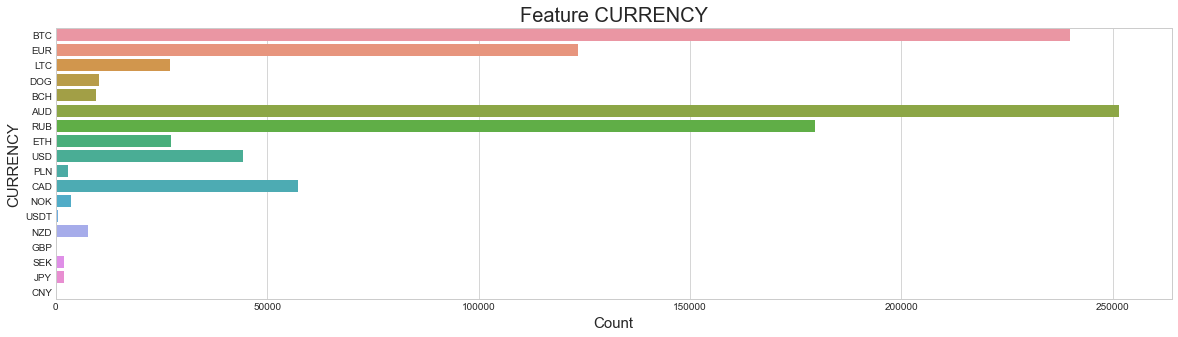

In [11]:
feature = 'CURRENCY'
simple_plot(feature, data = raw_data, figsize=(20,5))

In [12]:
raw_data.groupby('USER_ID').agg(lambda x:x.value_counts())['CURRENCY']

USER_ID
1                    2
5          [21, 15, 1]
181          [7, 6, 2]
1939                21
6784                 2
              ...     
2583538              7
2583547              8
2583592              1
2583636              2
2583705              2
Name: CURRENCY, Length: 39379, dtype: object

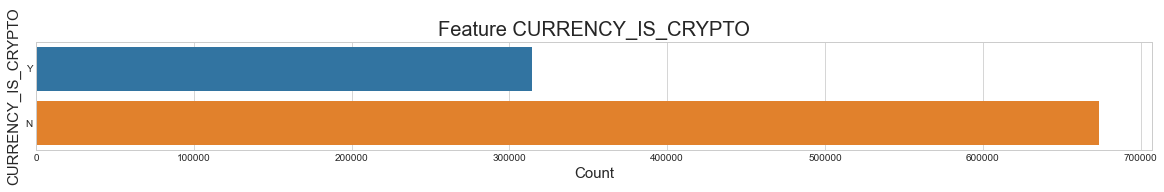

In [13]:
feature = 'CURRENCY_IS_CRYPTO'
simple_plot(feature, data = raw_data)

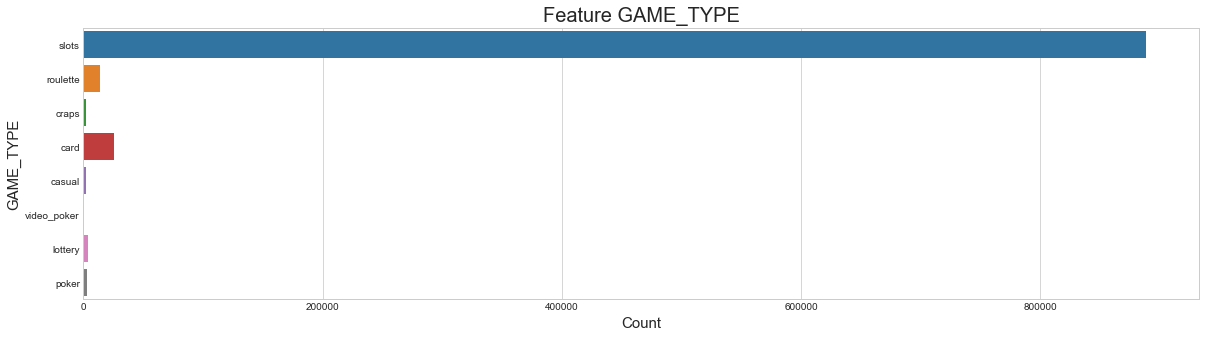

In [14]:
feature = 'GAME_TYPE'
simple_plot(feature, data = raw_data, figsize=(20,5))

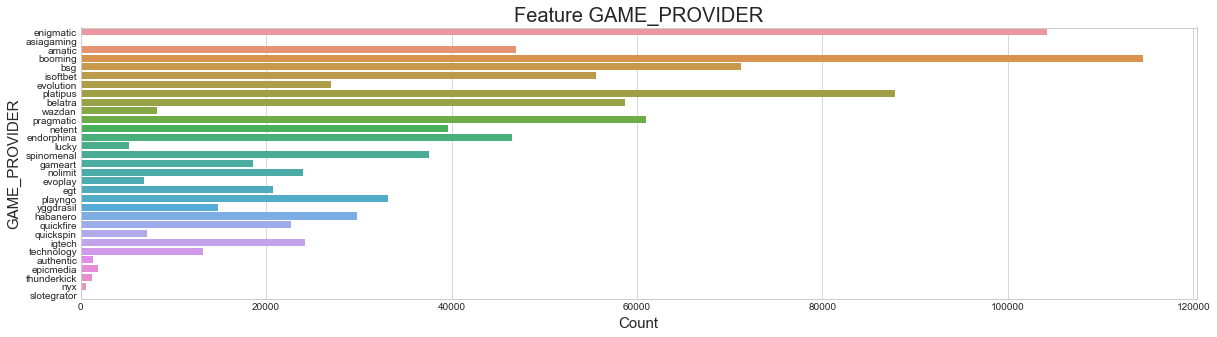

In [15]:
feature = 'GAME_PROVIDER'
simple_plot(feature, data = raw_data, figsize=(20,5))

In [16]:
feauture = 'BET_AMOUNT_IN_CURRENCY'
feauture = 'BET_AMOUNT_IN_EUR'
feauture = 'BET_COUNT'

In [17]:
r=raw_data.corr()
r1=r.sort_values('BET_COUNT',ascending=False)
r1[['BET_COUNT']].style.applymap(lambda x: 'background-color : red' if x>0.5 else '')

,BET_COUNT
BET_COUNT,1.000000
WIN_COUNT,0.915321
BET_AMOUNT_IN_EUR,0.227262
WIN_AMOUNT_IN_EUR,0.222696
BET_AMOUNT_IN_CURRENCY,0.181119
WIN_AMOUNT_IN_CURRENCY,0.175439
USER_ID,-0.024206


In [18]:
r2=r.sort_values('BET_AMOUNT_IN_EUR',ascending=False)
r2[['BET_AMOUNT_IN_EUR']].style.applymap(lambda x: 'background-color : red' if x>0.5 else '')

,BET_AMOUNT_IN_EUR
BET_AMOUNT_IN_EUR,1.000000
WIN_AMOUNT_IN_EUR,0.995683
WIN_COUNT,0.273522
BET_AMOUNT_IN_CURRENCY,0.247001
WIN_AMOUNT_IN_CURRENCY,0.240236
BET_COUNT,0.227262
USER_ID,-0.004051


In [19]:
r3=r.sort_values('BET_AMOUNT_IN_CURRENCY',ascending=False)
r3[['BET_AMOUNT_IN_CURRENCY']].style.applymap(lambda x: 'background-color : red' if x>0.5 else '')

,BET_AMOUNT_IN_CURRENCY
BET_AMOUNT_IN_CURRENCY,1.000000
WIN_AMOUNT_IN_CURRENCY,0.997082
BET_AMOUNT_IN_EUR,0.247001
WIN_AMOUNT_IN_EUR,0.242316
BET_COUNT,0.181119
WIN_COUNT,0.173052
USER_ID,-0.002335


In [20]:
# dropping columns
raw_data = raw_data.drop('WIN_AMOUNT_IN_CURRENCY',axis=1)
raw_data = raw_data.drop('WIN_AMOUNT_IN_EUR',axis=1)
raw_data = raw_data.drop('WIN_COUNT',axis=1)

## 3a. Missing values

In [21]:
def find_missing_values(data,columns):
    '''
    Generate information about missing data

    Parameters
    ----------
    data: Dataframe
        Pandas Dataframe for Users 
    columns : String 
        Column names from Dataframe
        
    Returns
    -------
    Info : Dictionary
        Column name: number of missing values    
    '''    
    
    missing_vals = {}                  
    for column in columns:             
        missing_vals[column] = len(data[column][data[column].isna()])
    return missing_vals

{'USER_ID': 0,
 'CURRENCY': 0,
 'CURRENCY_IS_CRYPTO': 0,
 'GAME_TITLE': 0,
 'GAME_TYPE': 47822,
 'GAME_PROVIDER': 3245,
 'BET_AMOUNT_IN_CURRENCY': 3385,
 'BET_AMOUNT_IN_EUR': 3385,
 'BET_COUNT': 3385}

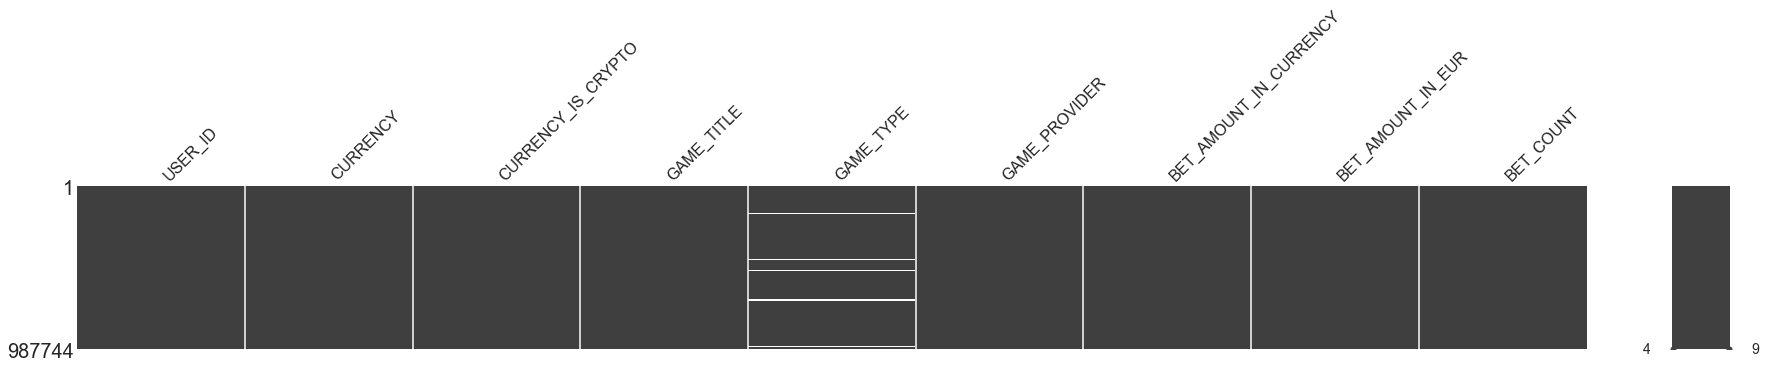

In [22]:
missingno.matrix(raw_data,figsize=(30,3))
find_missing_values(raw_data,columns = raw_data.columns)

In [23]:
# select cells that contain missing data to view them
raw_data.loc[raw_data['BET_COUNT'].isnull()]

,USER_ID,CURRENCY,CURRENCY_IS_CRYPTO,GAME_TITLE,GAME_TYPE,GAME_PROVIDER,BET_AMOUNT_IN_CURRENCY,BET_AMOUNT_IN_EUR,BET_COUNT
446,29291,AUD,N,Yak,NaN,NaN,NaN,NaN,NaN
458,29937,EUR,N,3 Kingdoms – Battle of Red Cliffs,slots,pragmatic,NaN,NaN,NaN
762,42413,BTC,Y,Good Girl,NaN,NaN,NaN,NaN,NaN
1351,55111,BTC,Y,Yak,NaN,NaN,NaN,NaN,NaN
1593,61295,BTC,Y,Yak,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
983015,2553946,BTC,Y,Good Girl,NaN,NaN,NaN,NaN,NaN
983975,2557627,BTC,Y,Good Girl,NaN,NaN,NaN,NaN,NaN
985624,2567772,EUR,N,Good Girl,NaN,NaN,NaN,NaN,NaN
985859,2569110,BTC,Y,Good Girl,NaN,NaN,NaN,NaN,NaN


In [24]:
# dropping rows with Nan values    (since <5% of data is missing dropping those rows is appropriate)
raw_data.dropna(subset=['BET_COUNT'], axis=0, inplace=True)
raw_data.reset_index(drop=True, inplace=True) 

In [25]:
# viewing Game PRovider vs Game type to help imputing missing values
providers_list = raw_data['GAME_PROVIDER'].unique()
for name in providers_list:
    print(name)
    print(raw_data[raw_data['GAME_PROVIDER'] == name]['GAME_TYPE'].unique())
    print('---')

enigmatic
['slots' 'craps' 'card' 'casual' nan 'lottery' 'poker' 'roulette'
 'video_poker']
---
asiagaming
[nan]
---
amatic
['slots' nan]
---
booming
['slots' nan]
---
bsg
['slots' nan 'video_poker' 'card' 'poker' 'casual']
---
isoftbet
['slots' nan 'card' 'roulette']
---
evolution
['roulette' 'card' 'casual' 'lottery' 'poker']
---
platipus
['slots' 'card' nan]
---
belatra
['slots' nan 'lottery' 'roulette']
---
wazdan
['slots' nan]
---
pragmatic
['slots' nan]
---
netent
['slots' nan 'video_poker' 'roulette' 'card']
---
endorphina
['slots' nan]
---
lucky
['slots']
---
spinomenal
['slots' nan 'card' 'roulette']
---
gameart
['slots' nan]
---
nolimit
['slots' nan]
---
evoplay
['slots' 'casual']
---
egt
['slots' nan 'card' 'lottery' 'roulette' 'video_poker']
---
playngo
['slots' nan]
---
yggdrasil
['slots' nan]
---
habanero
['slots' nan 'card']
---
quickfire
['slots' nan 'video_poker' 'casual' 'card']
---
quickspin
['slots' nan]
---
igtech
['slots' nan]
---
technology
['slots']
---
authenti

In [26]:
# replacing missing data
raw_data.loc[raw_data.GAME_PROVIDER=='asiagaming', 'GAME_TYPE'] = 'card'
raw_data.loc[raw_data.GAME_PROVIDER=='authentic', 'GAME_TYPE'] = 'roulette'
raw_data['GAME_TYPE'].replace(np.nan, 'slots', inplace=True) 

{'USER_ID': 0,
 'CURRENCY': 0,
 'CURRENCY_IS_CRYPTO': 0,
 'GAME_TITLE': 0,
 'GAME_TYPE': 0,
 'GAME_PROVIDER': 0,
 'BET_AMOUNT_IN_CURRENCY': 0,
 'BET_AMOUNT_IN_EUR': 0,
 'BET_COUNT': 0}

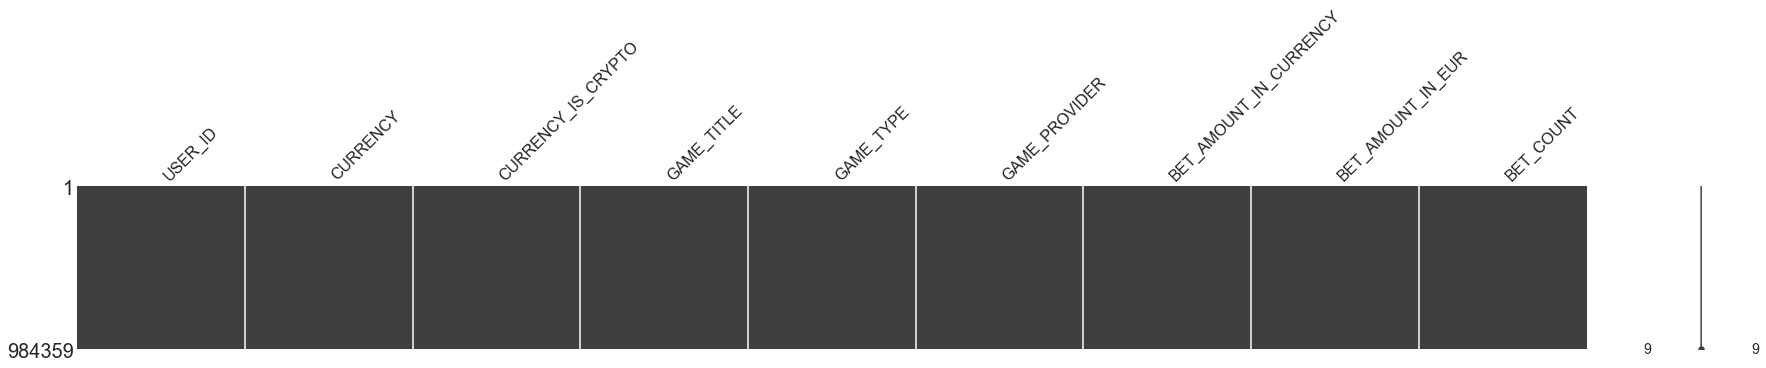

In [27]:
# checking missing data
missingno.matrix(raw_data,figsize=(30,3))
find_missing_values(raw_data,columns = raw_data.columns)

In [28]:
clean_data = raw_data

In [29]:
# Clean data info
clean_data.shape

(984359, 9)

In [30]:
print('There are {} unique users.'.format(len(clean_data['USER_ID'].unique())))
print('There are {} unique game titles.'.format(len(clean_data['GAME_TITLE'].unique())))

There are 39326 unique users.
There are 2569 unique game titles.


In [31]:
# Saving clean data
clean_data = raw_data
clean_data.to_csv('clean_data.csv', index=False)